#Problem Statement
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.


In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.


#Content
The Book-Crossing dataset comprises 3 files.

● Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [414]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity


##So we have no features related to interactions here thus we can't go for content-based filtering method, we have to choose Collaborative filtering method for recommendation here

In [415]:
book_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Book Recommendation System - Gulzar ./Books.csv')
rating_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Book Recommendation System - Gulzar ./Ratings.csv')
user_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Book Recommendation System - Gulzar ./Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [416]:
book_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [417]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [418]:
book_df=book_df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1)

In [419]:
(book_df['ISBN']=='object')

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Name: ISBN, Length: 271360, dtype: bool

In [420]:
rating_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [421]:
len(book_df['ISBN'].unique())

271360

In [422]:
len(rating_df['ISBN'].unique())

340556

In [423]:
df1=pd.merge(book_df,rating_df,on='ISBN')
df1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0
...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,276680,0


In [424]:
final_df=pd.merge(df1,user_df,on='User-ID')
final_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,259589,8,"venice, florida, usa",19.0
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,259591,8,"tioga, pennsylvania, usa",39.0
1031133,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,259614,10,"madrid, madrid, spain",22.0
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,259679,6,"grand prairie, texas, usa",27.0


In [425]:
len(df1['ISBN'].unique())

270151

In [426]:
len(final_df['ISBN'].unique())

270151

In [427]:
len(rating_df['User-ID'].unique())

105283

In [428]:
len(user_df['User-ID'].unique())

278858

In [429]:
len(df1['User-ID'].unique())

92106

In [430]:
len(final_df['User-ID'].unique())

92106

In [431]:
user_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [432]:
book_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [433]:
rating_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [434]:
user_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [435]:
dd=pd.merge(rating_df,user_df,on='User-ID')
ff=pd.merge(book_df,dd,on='ISBN')

In [436]:
len(ff)

1031136

In [437]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [438]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [439]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#Data cleaning:-

In [440]:
# Checking null values
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [441]:
rating_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [442]:
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

we can't drop or replace that this age column.

In [443]:
#Dropping null values of book df
book_df.dropna(inplace=True)

In [444]:
user_df.duplicated().values.any()

False

In [445]:
rating_df.duplicated().values.any()

False

In [446]:
book_df.duplicated().values.any()

False

No duplicated values in any df

#EDA

In [447]:
book_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [448]:
final_df.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,753301.000000
mean,1.405945e+05,2.839051e+00,37.397648
std,8.052466e+04,3.854157e+00,14.098254
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


In [449]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   User-ID              1031136 non-null  int64  
 6   Book-Rating          1031136 non-null  int64  
 7   Location             1031136 non-null  object 
 8   Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


In [450]:
final_df[final_df['User-ID']==11400]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
18,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0,"ottawa, ontario, canada",49.0
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9,"ottawa, ontario, canada",49.0
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,6,"ottawa, ontario, canada",49.0
21,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400,0,"ottawa, ontario, canada",49.0
22,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400,7,"ottawa, ontario, canada",49.0
...,...,...,...,...,...,...,...,...,...
75,0380723085,Durable Goods,Elizabeth Berg,1994,Perennial (HarperCollins),11400,0,"ottawa, ontario, canada",49.0
76,0312978383,Winter Solstice,Rosamunde Pilcher,2001,St. Martin's Paperbacks,11400,0,"ottawa, ontario, canada",49.0
77,0679449434,Joy School,ELIZABETH BERG,1997,Random House,11400,8,"ottawa, ontario, canada",49.0
78,0842371893,The Sister Circle (Sister Circle),Vonette Z. Bright,2003,Tyndale House Publishers,11400,5,"ottawa, ontario, canada",49.0


In [451]:
final_df['count'] = final_df[['User-ID']].groupby(final_df['User-ID']).transform('count')
# final_df[final_df['User-ID']==85526]

In [452]:
final_df_new = final_df[final_df['count']>150]
final_df_new = final_df_new.sort_values('count',ascending=False)
top_user_id=list(final_df_new['User-ID'].unique())
len(top_user_id)

1115

In [453]:
top_user_id[:10]

[11676, 198711, 153662, 98391, 35859, 212898, 278418, 76352, 110973, 235105]

Top books

In [454]:
top_books=final_df.groupby('Book-Title')['Book-Rating'].sum().reset_index()
top_books_df=top_books.sort_values(by=['Book-Rating'], ascending=False)
top_books_df

,Book-Title,Book-Rating
196326,The Lovely Bones: A Novel,5787
183573,The Da Vinci Code,4169
206502,The Secret Life of Bees,3442
204387,The Red Tent (Bestselling Backlist),3134
199237,The Nanny Diaries: A Novel,2923
...,...,...
43802,Dangerous Thing (Worldwide Mystery),0
141952,"Pomeranians: Everything About Purchase, Care, ...",0
141951,Pomegranates Full and Fine (The World of Darkn...,0
43803,Dangerous To Hold,0


In [455]:
op_books=final_df.groupby('ISBN')['Book-Rating'].sum().reset_index()
op_books_df=op_books.sort_values(by=['Book-Rating'], ascending=False)
op_books_df

,ISBN,Book-Rating
38570,0316666343,5787
70798,0385504209,4108
32370,0312195516,3134
125012,059035342X,2798
21342,0142001740,2595
...,...,...
124693,0590319299,0
124694,0590319302,0
124695,0590319329,0
124696,059031954X,0


In [456]:
import math

In [457]:
def smooth_user_preference(x):
    return math.log(1+x, 2)

full_df=final_df.groupby(['User-ID','ISBN'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(full_df))
full_df.head()

# of unique user/item interactions: 1031136


,User-ID,ISBN,Book-Rating
0,2,0195153448,0.000000
1,8,0002005018,2.584963
2,8,0060973129,0.000000
3,8,0374157065,0.000000
4,8,0393045218,0.000000


In [458]:
#for checking Duplicacy on the basis of 'User-ID','ISBN' (row-wise)

# def smooth_user_preference(x):
#     return math.log(1+x, 2)

# full_df=final_df.groupby(['User-ID','ISBN'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
# print('# of unique user/item interactions: %d' % len(full_df))
# full_df.head()

# OR

full_df=final_df.groupby(['User-ID','ISBN'])['Book-Rating'].mean().reset_index()
full_df=full_df.sort_values(by=['Book-Rating'], ascending=False)

print('# of unique user/item interactions: %d' % len(full_df))
full_df.head()


# of unique user/item interactions: 1031136


,User-ID,ISBN,Book-Rating
229245,61147,039567171X,10.0
915341,246311,0374121230,10.0
915166,246247,0486250334,10.0
915171,246247,0553351397,10.0
686123,187865,1573225789,10.0


In [459]:
filtered_rating = final_df[final_df['User-ID'].isin(top_user_id)]


In [460]:
filtered_rating

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,count
80,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,"n/a, n/a, n/a",NaN,11144
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,"n/a, n/a, n/a",NaN,11144
82,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,11676,8,"n/a, n/a, n/a",NaN,11144
83,0771074670,Nights Below Station Street,David Adams Richards,1988,Emblem Editions,11676,0,"n/a, n/a, n/a",NaN,11144
84,0440234743,The Testament,John Grisham,1999,Dell,11676,9,"n/a, n/a, n/a",NaN,11144
...,...,...,...,...,...,...,...,...,...,...
918888,044015877X,The Mountains of Eden,Jaroldeen Edwards,1984,Dell Publishing Company,247958,0,"big river, california, usa",44.0,170
918889,0441702902,Radiance,Anne Maybury,1980,Ace Books,247958,0,"big river, california, usa",44.0,170
918890,0553550187,"Chameleon (Loveswept Classic, Volume 5)",Courtney Henke,1994,Bantam,247958,0,"big river, california, usa",44.0,170
918891,0671034383,Bettypalooza: Clueless (CLUELESS),Elizabeth Lenhard,1999,Simon Spotlight Entertainment,247958,0,"big river, california, usa",44.0,170


In [461]:
#Selecting top 50 books with highest number of rating 
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [462]:
y

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [463]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=868)

In [464]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [465]:
final_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,count
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,"n/a, n/a, n/a",NaN,11144
84,0440234743,The Testament,John Grisham,1999,Dell,11676,9,"n/a, n/a, n/a",NaN,11144
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,11676,8,"n/a, n/a, n/a",NaN,11144
88,0971880107,Wild Animus,Rich Shapero,2004,Too Far,11676,6,"n/a, n/a, n/a",NaN,11144
89,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,11676,0,"n/a, n/a, n/a",NaN,11144
...,...,...,...,...,...,...,...,...,...,...
918734,0440201926,Kaleidoscope,Danielle Steel,1988,Dell,247958,10,"big river, california, usa",44.0,170
918736,0446353957,Mirror Image,Sandra Brown,1990,Warner Books,247958,0,"big river, california, usa",44.0,170
918740,0671741195,The Cradle Will Fall,Mary Higgins Clark,1991,Pocket,247958,0,"big river, california, usa",44.0,170
918745,155166674X,Between Friends,Debbie Macomber,2003,Mira Books,247958,0,"big river, california, usa",44.0,170


In [466]:
#Applying Pivot table on final_ratings dataframe
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [467]:
pt.fillna(0,inplace=True)

In [468]:
pt

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [469]:
#Applying cosine_similarity to pivot table
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(868, 868)

In [470]:
#Building recommender system
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = final_df[final_df['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Year-Of-Publication'].values.astype(int)))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Publisher'].values))
        # item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [471]:
recommend("The Kitchen God's Wife")

[["The Bonesetter's Daughter", 'Amy Tan', 2001, 'Putnam Publishing Group'],
 ['The Joy Luck Club', 'Amy Tan', 1994, 'Prentice Hall (K-12)'],
 ['The Hundred Secret Senses', 'Amy Tan', 1996, 'Ivy Books'],
 ['Tears of the Giraffe (No.1 Ladies Detective Agency)',
  'Alexander McCall Smith',
  2002,
  'Anchor']]

In [472]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   User-ID              1031136 non-null  int64  
 6   Book-Rating          1031136 non-null  int64  
 7   Location             1031136 non-null  object 
 8   Age                  753301 non-null   float64
 9   count                1031136 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 86.5+ MB


In [473]:
ratings_new = rating_df[rating_df.ISBN.isin(book_df.ISBN)]
rating_df.shape,ratings_new.shape

((1149780, 3), (1031133, 3))

It can be seen that many rows having book ISBN not part of books dataset got dropped off

Ratings dataset should have ratings from users which exist in users dataset.

In [474]:
# rating new==df1 shape but only book df column are aval in rating new

In [475]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(user_df['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031133, 3)
shape of dataset after dropping (1031133, 3)


It can be seen that no new user was there in ratings dataset.

In [476]:
import matplotlib.pyplot as plt

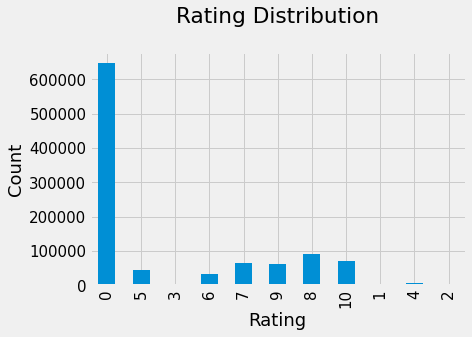

In [477]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [478]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [479]:
ratings_explicit.shape, ratings_implicit.shape

((383839, 3), (647294, 3))

In [480]:
ratings_explicit.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [481]:
import seaborn as sns
import matplotlib.pyplot as plt

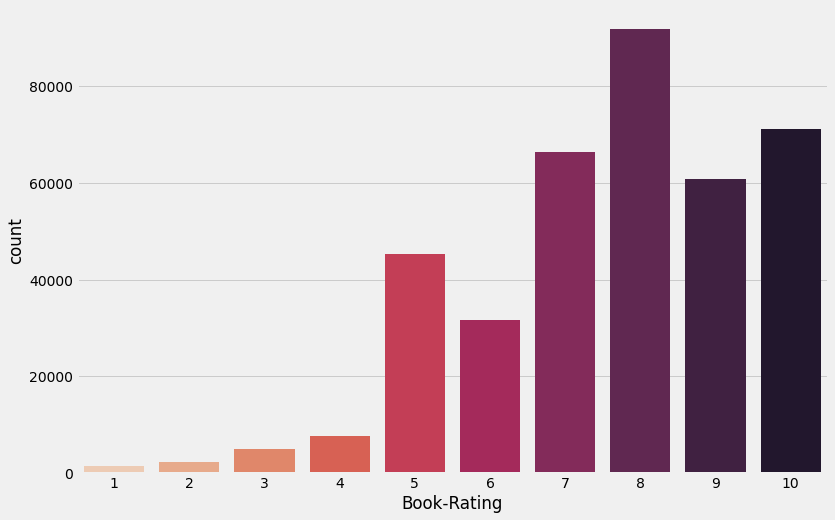

In [482]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

In [483]:
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [484]:
user_df.shape

(278858, 3)

In [485]:
book_df.shape

(271357, 5)

In [486]:
rating_df.shape

(1149780, 3)

In [487]:
df1.shape

(1031136, 7)

In [488]:
final_dataset=user_df.copy()
final_dataset=pd.merge(final_dataset,ratings_explicit,on='User-ID')
final_dataset=pd.merge(final_dataset,book_df,on='ISBN')

In [489]:
final_dataset

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,67544,"toronto, ontario, canada",30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,116866,"ottawa, ,",NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,123629,"kingston, ontario, canada",NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
...,...,...,...,...,...,...,...,...,...
383834,278851,"dallas, texas, usa",33.0,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001,Broadway Books
383835,278851,"dallas, texas, usa",33.0,0789721260,5,WebClasses From Scratch,Jesse Liberty,1999,Que
383836,278851,"dallas, texas, usa",33.0,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books
383837,278851,"dallas, texas, usa",33.0,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997,Kqed Books


In [490]:
final_dataset

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,67544,"toronto, ontario, canada",30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,116866,"ottawa, ,",NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,123629,"kingston, ontario, canada",NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
...,...,...,...,...,...,...,...,...,...
383834,278851,"dallas, texas, usa",33.0,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001,Broadway Books
383835,278851,"dallas, texas, usa",33.0,0789721260,5,WebClasses From Scratch,Jesse Liberty,1999,Que
383836,278851,"dallas, texas, usa",33.0,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books
383837,278851,"dallas, texas, usa",33.0,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997,Kqed Books


In [491]:
# missing_values(final_dataset)

In [492]:
# train_df, test_df = train_test_split(final_dataset,
                                    
#                                    test_size=0.20,
#                                    random_state=42)

# print('# interactions on Train set: %d' % len(train_df))
# print('# interactions on Test set: %d' % len(test_df))

In [493]:
# train_df

In [494]:
# test_df

In [495]:
# dd=train_df[['User-ID','ISBN','Book-Rating']]

In [496]:
# user_item_pivot_df=dd.pivot(index='User-ID',columns='ISBN',values='Book-Rating').fillna(0)
# user_item_pivot_df

In [497]:
rating_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [498]:
users_ratings_count_df = ratings_explicit.groupby(['User-ID', 'ISBN']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_ratings_count_df))

users_with_enough_ratings_df = users_ratings_count_df[users_ratings_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 150 ratings: %d' % len(users_with_enough_ratings_df))

# of users: 68091
# of users with at least 150 ratings: 449


In [499]:
users_ratings_count_df

User-ID
8          7
9          1
12         1
14         3
16         1
          ..
278846     1
278849     1
278851    14
278852     1
278854     6
Length: 68091, dtype: int64

In [500]:
users_with_enough_ratings_df

,User-ID
0,2033
1,2110
2,2276
3,4017
4,4385
...,...
444,274061
445,274301
446,275970
447,277427


In [501]:
print('# of interactions: %d' % len(ratings_explicit))
ratings_from_selected_users_df = ratings_explicit.merge(users_with_enough_ratings_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(ratings_from_selected_users_df))

# of interactions: 383839
# of interactions from users with at least 5 interactions: 103269


In [502]:
len(ratings_from_selected_users_df['User-ID'].unique())

449

In [503]:
ratings_from_selected_users_df

,User-ID,ISBN,Book-Rating
0,2033,0030020786,7
1,2033,0060248025,10
2,2033,0060256664,10
3,2033,0060256737,10
4,2033,0060950536,10
...,...,...,...
103264,278418,0886775981,5
103265,278418,0898151899,9
103266,278418,155882068X,5
103267,278418,1569751544,3


In [504]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
ratings_full_df = ratings_from_selected_users_df.groupby(['User-ID', 'ISBN'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(ratings_full_df))
ratings_full_df.head()

# of unique user/item interactions: 103269


,User-ID,ISBN,Book-Rating
0,2033,0030020786,3.000000
1,2033,0060248025,3.459432
2,2033,0060256664,3.459432
3,2033,0060256737,3.459432
4,2033,0060950536,3.459432


In [505]:
ratings_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103269 entries, 0 to 103268
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      103269 non-null  int64  
 1   ISBN         103269 non-null  object 
 2   Book-Rating  103269 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [506]:
ratings_train_df, ratings_test_df = train_test_split(ratings_full_df,
                                    stratify=ratings_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(ratings_train_df))
print('# interactions on Test set: %d' % len(ratings_test_df))

# interactions on Train set: 82615
# interactions on Test set: 20654


In [507]:
ratings_train_df.head()

,User-ID,ISBN,Book-Rating
28445,63714,1903047439,3.459432
100047,264321,0345441710,2.807355
40201,97874,034545281X,3.459432
59360,142524,0553342762,3.000000
59152,141902,0374121230,3.321928


In [508]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = ratings_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [509]:
users_items_pivot_matrix_df.shape

(449, 55738)

In [510]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [511]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [512]:
len(users_ids)

449

In [513]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [514]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [515]:
users_items_pivot_matrix.shape

(449, 55738)

In [516]:
U.shape

(449, 15)

In [517]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [518]:
Vt.shape

(15, 55738)

In [519]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.40538194e-02,  2.18631019e-03,  2.58704918e-03, ...,
         2.45854963e-04,  5.80269232e-04,  1.38309554e-02],
       [-7.15073463e-04, -8.82591011e-04, -1.04436523e-03, ...,
         8.87652801e-05,  1.84563146e-04,  4.38063934e-03],
       [-2.02515370e-03, -1.73356715e-03, -2.05132075e-03, ...,
         1.78345007e-04,  4.04222274e-04,  7.32484372e-03],
       ...,
       [ 4.20660647e-03,  1.96645675e-03,  2.32689777e-03, ...,
         2.49712510e-04,  4.73030727e-04,  8.35573641e-03],
       [ 1.13676087e-02, -2.21447453e-03, -2.62037589e-03, ...,
         3.41062452e-04,  6.59116605e-04,  1.16812271e-02],
       [-1.44761187e-03,  5.13994957e-03,  6.08207489e-03, ...,
         8.58442103e-05,  1.46905746e-04,  2.89566166e-03]])

In [520]:
users_items_pivot_matrix_df

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.459432,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [521]:
all_user_predicted_ratings.shape

(449, 55738)

In [522]:
len(users_ids)

449

In [523]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.014054,-0.000715,-0.002025,0.000752,-0.001929,-0.003501,-0.002682,0.006576,0.001400,0.013285,...,0.000502,0.003199,-0.001789,0.007497,-0.012004,0.001277,0.007516,0.004207,0.011368,-0.001448
000104687X,0.002186,-0.000883,-0.001734,0.016673,-0.000697,0.008500,0.013734,0.007377,-0.003087,0.015762,...,-0.002450,0.013465,-0.001160,0.013658,-0.004609,-0.006250,0.007928,0.001966,-0.002214,0.005140
0001047213,0.002587,-0.001044,-0.002051,0.019729,-0.000825,0.010058,0.016251,0.008729,-0.003653,0.018651,...,-0.002899,0.015933,-0.001373,0.016161,-0.005453,-0.007396,0.009381,0.002327,-0.002620,0.006082
0001047973,0.002587,-0.001044,-0.002051,0.019729,-0.000825,0.010058,0.016251,0.008729,-0.003653,0.018651,...,-0.002899,0.015933,-0.001373,0.016161,-0.005453,-0.007396,0.009381,0.002327,-0.002620,0.006082
000104799X,0.001051,0.000383,0.000752,0.002271,0.000237,0.001082,0.001158,0.002106,0.001663,0.003781,...,0.001297,0.002129,0.002637,0.001051,0.001605,0.002179,0.002124,0.000821,0.001370,0.000304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0000VZEJQ,0.001082,0.000349,0.000651,0.001640,0.000172,0.000885,0.000828,0.001786,0.001245,0.002960,...,0.001129,0.001798,0.001979,0.000935,0.001414,0.002004,0.001663,0.000692,0.001073,0.000273
B0000X8HIE,0.002139,0.000614,0.001056,0.001695,0.000159,0.001079,0.000854,0.002688,0.001577,0.003745,...,0.001698,0.002594,0.002289,0.001448,0.001477,0.003118,0.002171,0.001005,0.001561,0.000366
B00013AX9E,0.000246,0.000089,0.000178,0.000661,0.000055,0.000309,0.000331,0.000587,0.000425,0.001058,...,0.000357,0.000538,0.000712,0.000294,0.000418,0.000602,0.000582,0.000250,0.000341,0.000086


In [524]:
book_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [525]:
#Indexing by personId to speed up the searches during evaluation
ratings_full_indexed_df = ratings_full_df.set_index('User-ID')
ratings_train_indexed_df = ratings_full_df.set_index('User-ID')
ratings_test_indexed_df = ratings_full_df.set_index('User-ID')

In [526]:
book_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [527]:
len(cf_preds_df.columns)

449

In [528]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        # self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(book_df,on='ISBN',how='inner')[['ISBN', 'Book-Title','recStrength']]


        # if verbose:
        #     if self.items_df is None:
        #         raise Exception('"items_df" is required in verbose mode')

        #     recommendations_df = recommendations_df.merge(self.items_df, how = 'inner', 
        #                                                   left_on = 'ISBN', 
        #                                                   right_on = 'ISBN')[['ISBN', 'Book-Author', 'Book-Title', 'Year-Of-Publication', 'Publisher','recStrength']]


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df)

In [529]:
def get_items_interacted(user_id, ratings_df):
    interacted_items = ratings_df.loc[user_id]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [530]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, ratings_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = ratings_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, ratings_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()    

In [531]:
# #Top-N accuracy metrics consts
# EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

# class ModelEvaluator:

#     # Function for getting the set of items which a user has not interacted with
#     def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
#         interacted_items = get_items_interacted(person_id, ratings_full_indexed_df)
#         all_items = set(book_df['ISBN'])
#         non_interacted_items = all_items - interacted_items

#         random.seed(seed)
#         non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
#         return set(non_interacted_items_sample)

#     # Function to verify whether a particular item_id was present in the set of top N recommended items
#     def _verify_hit_top_n(self, item_id, recommended_items, topn):        
#             try:
#                 index = next(i for i, c in enumerate(recommended_items) if c == item_id)
#             except:
#                 index = -1
#             hit = int(index in range(0, topn))
#             return hit, index
    
#     # Function to evaluate the performance of model for each user
#     def evaluate_model_for_user(self, model, person_id):
        
#         # Getting the items in test set
#         interacted_values_testset = ratings_test_indexed_df.loc[person_id]
        
#         if type(interacted_values_testset['ISBN']) == pd.Series:
#             person_interacted_items_testset = set(interacted_values_testset['ISBN'])
#         else:
#             person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
#         interacted_items_count_testset = len(person_interacted_items_testset) 

#         # Getting a ranked recommendation list from the model for a given user
#         person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, ratings_train_indexed_df),topn=10000000000)

#         hits_at_5_count = 0
#         hits_at_10_count = 0
        
#         # For each item the user has interacted in test set
#         for item_id in person_interacted_items_testset:
            
#             # Getting a random sample of 100 items the user has not interacted with
#             non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id%(2**32))

#             # Combining the current interacted item with the 100 random items
#             items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

#             # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
#             valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
#             valid_recs = valid_recs_df['ISBN'].values
            
#             # Verifying if the current interacted item is among the Top-N recommended items
#             hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
#             hits_at_5_count += hit_at_5
#             hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
#             hits_at_10_count += hit_at_10

#         # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
#         recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
#         recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

#         person_metrics = {'hits@5_count':hits_at_5_count, 
#                           'hits@10_count':hits_at_10_count, 
#                           'interacted_count': interacted_items_count_testset,
#                           'recall@5': recall_at_5,
#                           'recall@10': recall_at_10}
#         return person_metrics

    
#     # Function to evaluate the performance of model at overall level
#     def evaluate_model(self, model):
        
#         people_metrics = []
        
#         for idx, person_id in enumerate(list(ratings_test_indexed_df.index.unique().values)):    
#             person_metrics = self.evaluate_model_for_user(model, person_id)  
#             person_metrics['_person_id'] = person_id
#             people_metrics.append(person_metrics)
            
#         print('%d users processed' % idx)

#         detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
#         global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
#         global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
#         global_metrics = {'modelName': model.get_model_name(),
#                           'recall@5': global_recall_at_5,
#                           'recall@10': global_recall_at_10}    
#         return global_metrics, detailed_results_df
    
# model_evaluator = ModelEvaluator()    

In [532]:
print(list(ratings_full_indexed_df.index.values))

[2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 211

In [533]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  11676
Recommendation for User-ID =  11676
         ISBN                                         Book-Title  recStrength
0  0452282152                          Girl with a Pearl Earring     0.077757
1  0312980140                  Seven Up (A Stephanie Plum Novel)     0.077120
2  0553250531                               The Valley of Horses     0.063549
3  0440214041                                  The Pelican Brief     0.062479
4  0440212561                                          Outlander     0.060371
5  0440220602                                        The Chamber     0.060060
6  0385492081  Into Thin Air : A Personal Account of the Mt. ...     0.059306
7  0446606812                                Message in a Bottle     0.058308
8  0060928336    Divine Secrets of the Ya-Ya Sisterhood: A Novel     0.057834
9  0805063897   Nickel and Dimed: On (Not) Getting By in America     0.056796


In [534]:
ratings_full_indexed_df

,ISBN,Book-Rating
User-ID,,
2033,0030020786,3.000000
2033,0060248025,3.459432
2033,0060256664,3.459432
2033,0060256737,3.459432
2033,0060950536,3.459432
...,...,...
278418,0886775981,2.584963
278418,0898151899,3.321928
278418,155882068X,2.584963


In [535]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, ratings_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = ratings_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, ratings_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(ratings_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
